SVM Cross-Validation Scores: [0.9     0.93125 0.90625 0.93125 0.94375]
Mean CV Accuracy: 0.9225
SVM Test Accuracy: 0.9433333333333334


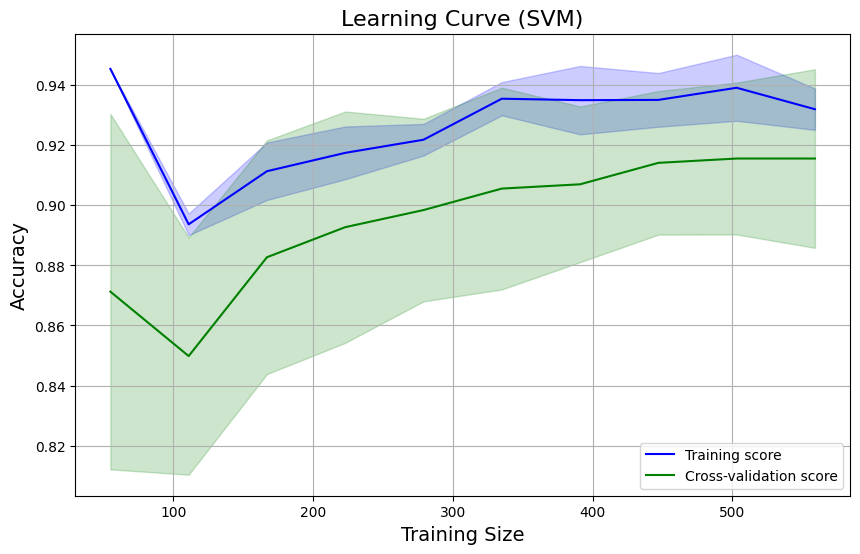

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Optional for imbalanced datasets

# Load dataset
file_path = 'DataSet.csv'  # Update with your actual path
df = pd.read_csv(file_path)

# Preprocess the dataset
df.fillna(df.mean(), inplace=True)
df['needs_scaling'] = df.apply(
    lambda row: 1 if row['cpu'] > 70 or row['ram'] > 85 or row['disk'] > 70 or row['network'] > 15 else 0, axis=1)

# Define features and target
X = df.drop(columns=['needs_scaling'])
y = df['needs_scaling']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optional: Balance the dataset using SMOTE (if the dataset is imbalanced)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize SVM with a lower C value (regularization)
svm = SVC(kernel='rbf', C=0.5, gamma='scale', random_state=42)

# Compute cross-validation scores
cross_val_scores = cross_val_score(svm, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Scores: {cross_val_scores}")
print(f"Mean CV Accuracy: {cross_val_scores.mean()}")

# Fit the model
svm.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Test Accuracy: {accuracy}")

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm, X_train, y_train, cv=5, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve to check for overfitting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.2)
plt.title("Learning Curve (SVM)", fontsize=16)
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(loc="best")
plt.grid(True)
plt.show()
